The goal here is to replicate the findings of the Matlab GLM and make sure I'm not shooting myself in the foot somewhere

In [1]:
# Imports
import os
import numpy as np
import pandas as pd
from scipy import io as sio
from matplotlib import pyplot as plt

In [2]:
%matplotlib inline

In [23]:
# Paths
in_path = '/data1/guilimin/abide/subtype/sc7/srs_maybe/'
in_pheno = '/data1/guilimin/abide/pheno/model_srs_maybe_sc7.csv'

In [24]:
pheno = pd.read_csv(in_pheno)

In [27]:
a = sio.loadmat(os.path.join(in_path, 'subtype_weights.mat'))

In [28]:
x = np.array(a['weight_mat'])

In [30]:
pat_ind = np.where(pheno.DX_GROUP==1)
ctr_ind = np.where(pheno.DX_GROUP==2)

In [31]:
pheno.DX_GROUP.value_counts()

2    105
1    105
Name: DX_GROUP, dtype: int64

In [32]:
pat = x[pat_ind, 1, 1]
ctr = x[ctr_ind, 1, 1]

In [33]:
conc = np.concatenate((pat, ctr),axis=0)

In [34]:
ctr.shape[1]

105

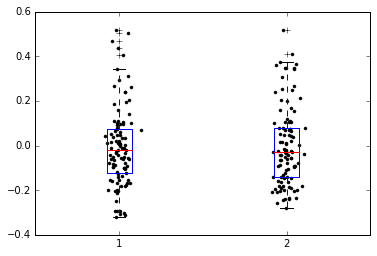

In [35]:
f = plt.figure()
ax = f.add_subplot(111)

pat_x = np.random.normal(1, 0.04, pat.shape[1])
tmp = ax.plot(pat_x, pat[0,:], '.k')
ctr_x = np.random.normal(2, 0.04, ctr.shape[1])
tmp = ax.plot(ctr_x, ctr[0,:], '.k')
tmp = ax.boxplot(conc.T)

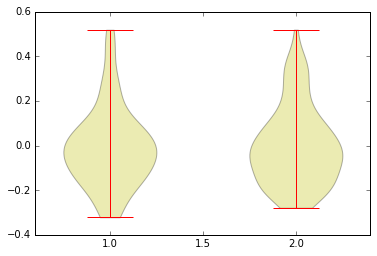

In [36]:
f = plt.figure()
ax = f.add_subplot(111)

tmp = ax.violinplot(conc.T)